# Pre-Processing Techniques

## Imports

In [84]:
# CONSTANT Variables
files = ['Data/Plasma/BLENNOWPLASMATAU_07Feb2024.csv', 'Data/Plasma/ADNI_BLENNOWPLASMANFL_10_03_18_27Nov2023.csv', 'Data/Plasma/UPENNPLASMA_27Nov2023.csv']

fields_needed = ['RID', 'VISCODE', 'PLASMA_NFL', 'PLASMATAU', 'AB42', 'AB40'] # Fields needed after the merge
# This is the AB value names that can be used
abvals = ['AB42', 'AB40']

display1 = ['PLASMA_NFL', 'PLASMATAU', 'AB4240'] # These should be the biomarker values
display2 = ['MMSE', 'PTEDUCAT', 'AGE'] # This should be the Non-Blood values, such as MMSE etc.

output_file_path = "File1/"

In [85]:
#TODO: Deal with NULL values
%reload_ext autoreload
%autoreload 2
import pandas as pd
from PreProcessingPy import pp

## Read the Relevant Dataframes and Merge

In [86]:
# Read the dfs
preprocessor = pp(files, ['RID', 'VISCODE'], fields_needed)

# Create the AB42/AB40 value
preprocessor.create_ab4240(abvals)
preprocessor.df


,RID,VISCODE,PLASMA_NFL,PLASMATAU,AB4240
0,2,bl,28.2,2.41,0.331165
1,3,bl,188.3,3.84,0.220661
2,4,bl,31.2,3.76,0.311458
3,5,bl,36.3,3.81,0.189760
4,6,bl,52.5,2.86,0.153287
...,...,...,...,...,...
519,1402,bl,94.1,4.45,0.260446
520,1409,bl,46.4,3.54,0.231390
521,1414,bl,18.7,1.45,0.130205
522,1419,bl,25.8,1.56,0.194001


In [87]:
preprocessor.add_adni_merge_data(['RID', 'VISCODE', 'DX', 'PLASMA_NFL', 'PLASMATAU', 'AB4240', 'MMSE', 'PTEDUCAT', 'AGE'])
preprocessor.df

/Users/danielmakin/Documents/Alzhiemers/NoMoreAlzheimersDisease/PreProcessingPy.py:56: DtypeWarning: Columns (20,105) have mixed types. Specify dtype option on import or set low_memory=False.
  am = pd.read_csv('Data/ADNIMERGE_15Jun2023.csv')


,RID,VISCODE,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,PTEDUCAT,AGE
0,2,bl,CN,28.2,2.41,0.331165,28.0,16,74.3
1,3,bl,Dementia,188.3,3.84,0.220661,20.0,18,81.3
2,4,bl,MCI,31.2,3.76,0.311458,27.0,10,67.5
3,5,bl,CN,36.3,3.81,0.189760,29.0,16,73.7
4,6,bl,MCI,52.5,2.86,0.153287,25.0,13,80.4
...,...,...,...,...,...,...,...,...,...
519,1402,bl,Dementia,94.1,4.45,0.260446,23.0,20,69.3
520,1409,bl,Dementia,46.4,3.54,0.231390,21.0,15,65.9
521,1414,bl,MCI,18.7,1.45,0.130205,27.0,18,74.3
522,1419,bl,MCI,25.8,1.56,0.194001,28.0,17,77.9


## Rename Fields

In [88]:
# Rename to be more intuitive for rest of detection
preprocessor.clean_data()
preprocessor.df

,RID,VISCODE,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,PTEDUCAT,AGE
0,2,bl,SCD,28.2,2.41,0.331165,28.0,16,74.3
1,3,bl,AD,188.3,3.84,0.220661,20.0,18,81.3
2,4,bl,MCI,31.2,3.76,0.311458,27.0,10,67.5
3,5,bl,SCD,36.3,3.81,0.189760,29.0,16,73.7
4,6,bl,MCI,52.5,2.86,0.153287,25.0,13,80.4
...,...,...,...,...,...,...,...,...,...
519,1402,bl,AD,94.1,4.45,0.260446,23.0,20,69.3
520,1409,bl,AD,46.4,3.54,0.231390,21.0,15,65.9
521,1414,bl,MCI,18.7,1.45,0.130205,27.0,18,74.3
522,1419,bl,MCI,25.8,1.56,0.194001,28.0,17,77.9


## Plot the data

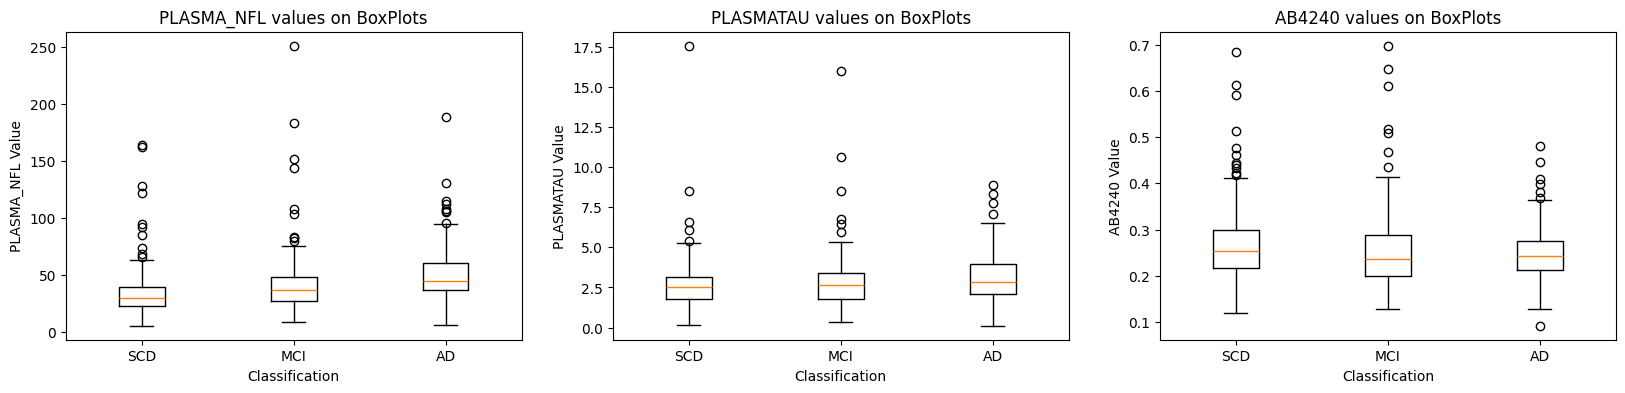

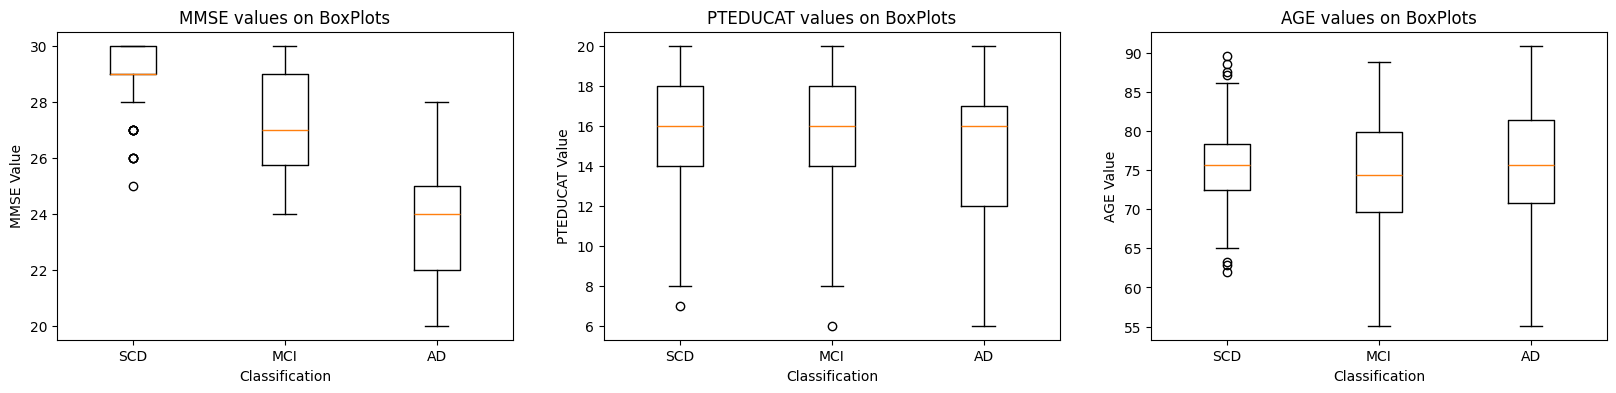

In [89]:
from PreProcessingPy import visual_display
vd = visual_display(preprocessor.df)

vd.display(display1)
vd.display(display2)

In [90]:
# Write this to the Data file
preprocessor.write_to_csv(output_file_path + '/UnCleanData/data.csv')

## Identify Outliers

In [91]:
# SOURCE :: https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/#:~:text=Use%20Inter%2DQuartile%20Range%20(IQR,percentile%20of%20the%20dataset%2C%20respectively.

preprocessor.remove_outliers(display1)

[6, 9, 398, 21, 282, 284, 286, 32, 163, 42, 180, 53, 181, 56, 184, 198, 77, 210, 94, 101, 363, 368, 242, 118, 253]


### Display the Filtered Data

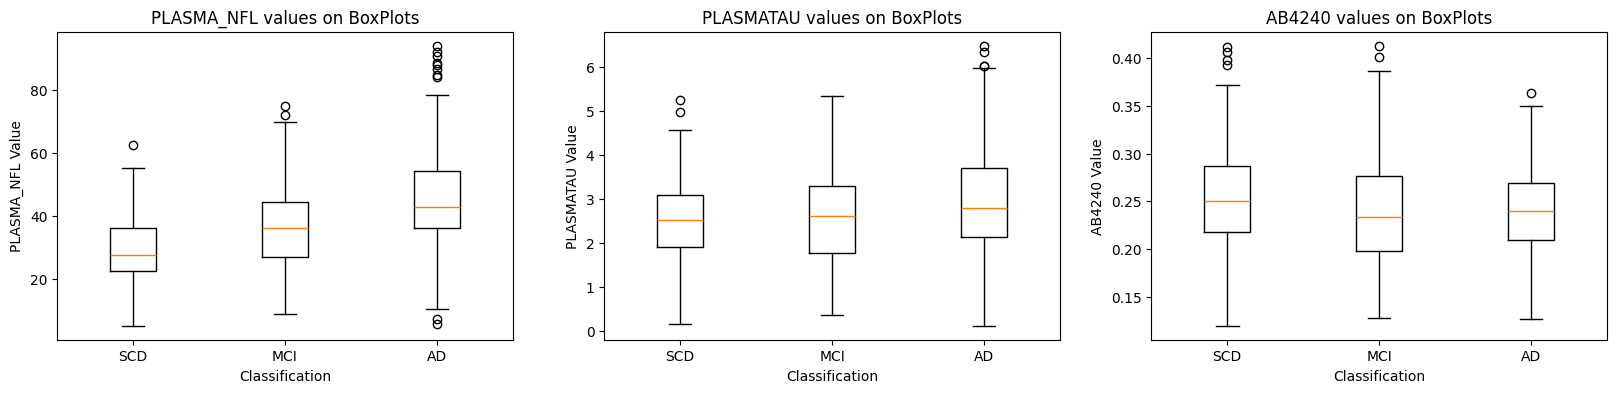

In [92]:
vd = visual_display(preprocessor.df)
vd.display(display1)

In [93]:
# Write this to a data file (with the outliers removed)
preprocessor.write_to_csv(output_file_path + 'CleanedData/data.csv')

## SMOTE Oversampling

In [94]:
preprocessor.use_SMOTE() # Needs to remove the RID, VISCODE Values (Shouldn't be needed)
preprocessor.df

,PLASMA_NFL,PLASMATAU,AB4240,MMSE,PTEDUCAT,AGE,DX
0,28.2,2.41,0.331165,28.0,16.0,74.3,SCD
1,36.3,3.81,0.18976,29.0,16.0,73.7,SCD
2,39.3,4.51,0.205351,29.0,12.0,78.5,SCD
3,23.6,4.57,0.398098,28.0,9.0,65.4,SCD
4,25.0,2.57,0.410816,29.0,18.0,73.1,SCD
...,...,...,...,...,...,...,...
460,30.048668,3.380268,0.257699,23.906669,17.720006,84.346666,AD
461,30.471131,2.66029,0.221768,26.026244,16.052489,72.957467,AD
462,23.956785,3.748795,0.188866,28.463988,13.268006,72.82881,SCD
463,51.340805,4.248619,0.276714,30.0,16.802683,81.906037,SCD


## Analysis of the SMOTE Data

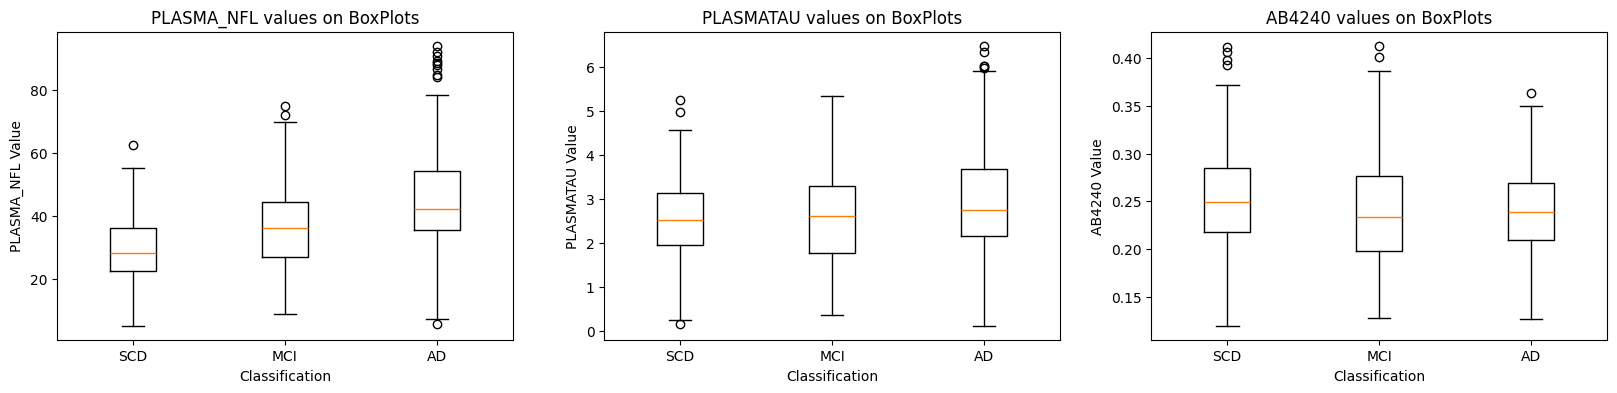

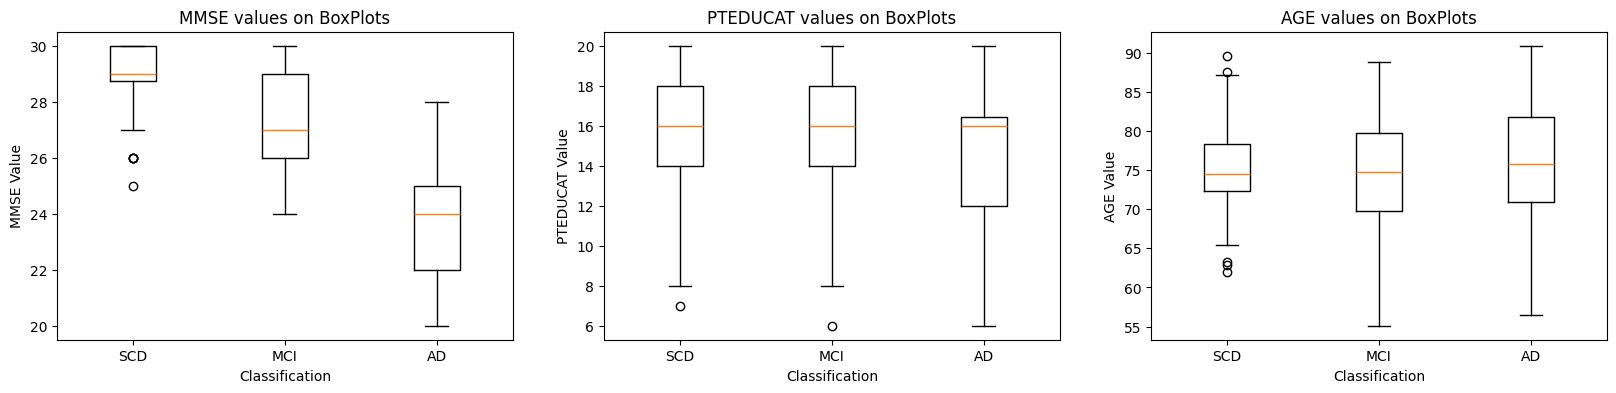

In [95]:
vd = visual_display(preprocessor.df)
vd.display(display1)
vd.display(display2)

In [96]:
preprocessor.write_to_csv(output_file_path + 'SMOTEData/data.csv')

## Effects of Pre-Processing in terms of Class Sizes

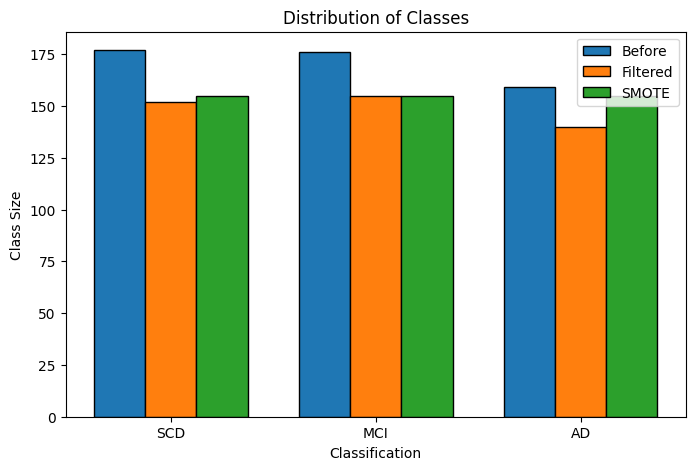

In [106]:
from PreProcessingPy import post_processing_display
# Compare Sizes of the data throughout processing
display = post_processing_display("File1")
display.display_results()